In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.callbacks import ModelCheckpoint,EarlyStopping


'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find any matches for wildcard specification "train.zip?dl=0".

No zipfiles found.


In [2]:
Datadirectory = "C://Users//souvi//Desktop//AI Project//Emotion Detection//archive//train"

In [3]:
Classes = ["0","1","2","3","4","5","6"]

In [4]:
base_model = MobileNet(input_shape=(224,224,3),include_top= False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7,activation='softmax')(x)

model = Model(base_model.input,x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [6]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,horizontal_flip=True,rescale=1./255)
train_data = train_datagen.flow_from_directory(directory = "C://Users//souvi//Desktop//AI Project//Emotion Detection//archive//train",target_size=(224,224),batch_size=32)
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_data = val_datagen.flow_from_directory(directory = "C://Users//souvi//Desktop//AI Project//Emotion Detection//archive//train",target_size=(224,224),batch_size=32)

Found 28709 images belonging to 7 classes.


In [9]:
t_img,label = train_data.next()
def plotImages(img_arr,label):
    count = 0
    for im,l in zip(img_arr,label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break

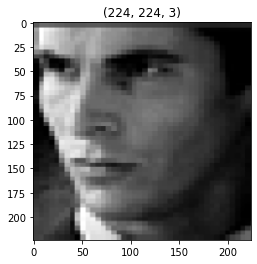

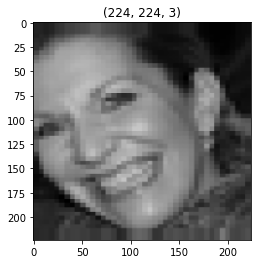

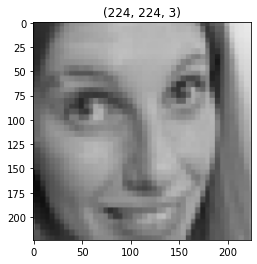

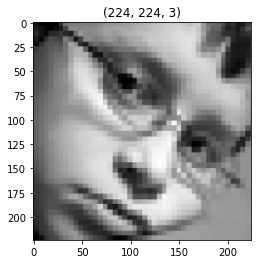

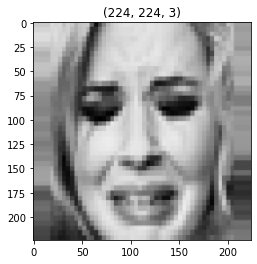

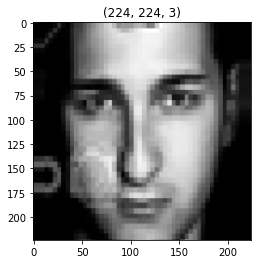

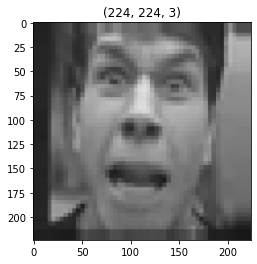

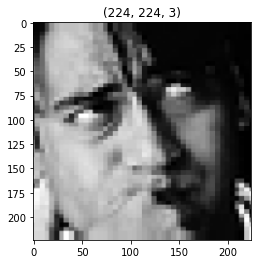

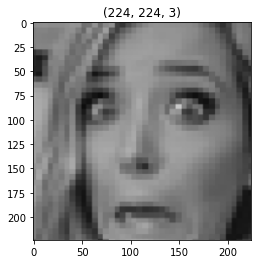

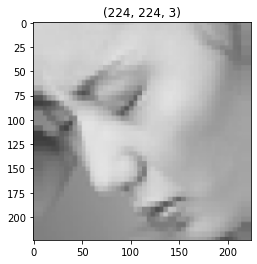

In [10]:
plotImages(t_img,label)

In [11]:
es = EarlyStopping(monitor='val_accuracy',min_delta = 0.01,patience =5,verbose=1,mode='auto')
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back = [es,mc]

In [12]:
hist = model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,mc])

<ipython-input-12-e6dff8f84484>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 19.8191 - accuracy: 0.2344
Epoch 1: val_accuracy improved from -inf to 0.26953, saving model to best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 19.8191 - accuracy: 0.2344 - val_loss: 18.3947 - val_accuracy: 0.2695
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 16.4539 - accuracy: 0.2906
Epoch 2: val_accuracy improved from 0.26953 to 0.33594, saving model to best_model.h5
10/10 [==============================] - 15s 2s/step - loss: 16.4539 - accuracy: 0.2906 - val_loss: 8.2872 - val_accuracy: 0.3359
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.1545 - accuracy: 0.3531
Epoch 3: val_accuracy improved from 0.33594 to 0.38281, saving model to best_model.h5
10/10 [==============================] - 15s 2s/step - loss: 7.1545 - accuracy: 0.3531 - val_loss: 8.1626 - val_accuracy: 0.3828
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.8